<a href="https://colab.research.google.com/github/Saeif-Saleh/Banking-System/blob/master/Classify_different_antennas_900_175_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
# !pip install --upgrade tensorflow


Tue Mar 24 01:48:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/Antenna/R900_175.mat')

In [17]:
print(list(matlab_data.keys())[3:])

['R900_T2450_test', 'R900_T2450_train', 'R900_T500_test', 'R900_T500_train', 'R900_T900_test', 'R900_T900_train']


In [0]:
train_900=matlab_data['R900_T900_train']
train_2450=matlab_data['R900_T2450_train']
train_500=matlab_data['R900_T500_train']


In [19]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)


(66587723, 2)
(70752732, 2)
(66592942, 2)


In [0]:
test_900=matlab_data['R900_T900_test']
test_2450=matlab_data['R900_T2450_test']
test_500=matlab_data['R900_T500_test']


In [21]:
print(test_900.shape)
print(test_2450.shape)
print(test_500.shape)


(15660325, 2)
(14331904, 2)
(14666149, 2)


In [22]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(66587723, 2)
(70752732, 2)
(66592942, 2)


In [0]:
#Slicing data to be divisible by 2**n 
# train_900=train_900[1000000:5194304]
# train_2450=train_2450[1000000:5194304]
# train_500=train_500[1000000:5194304]

train_900=train_900[1000000:34554432]
train_2450=train_2450[1000000:34554432]
train_500=train_500[1000000:34554432]

# train_900=train_900[1000000:34554432,0]
# train_2450=train_2450[1000000:34554432,0]
# train_500=train_500[1000000:34554432,0]







In [0]:
import pandas as pd

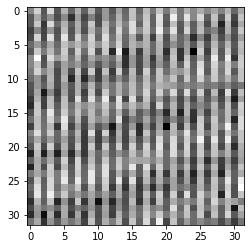

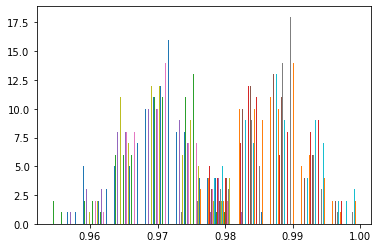

	Stdv= 0.009859
	Mean= 0.978681
	Variance= 0.000097


In [38]:
img=train_500[3*1024:4*1024] # 0:1024    1024:2*1024         2*1024:3*1024
img=np.sqrt(np.power(img[:,0],2)+np.power(img[:,1],2))
img=img.reshape(32,32)
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()
plt.hist(img)
plt.show()
df=pd.DataFrame(img.flatten())
print('\033[1m\tStdv={}'.format(df.std().to_string(index=False)))
print('\tMean={}'.format(df.mean().to_string(index=False)))
print('\tVariance={}'.format(df.var().to_string(index=False)))


In [0]:
# test_900=test_900[1000000:9388608]
# test_2450=test_2450[1000000:9388608]
# test_500=test_500[1000000:9388608]

test_900=test_900[1000000:9388608]
test_2450=test_2450[1000000:9388608]
test_500=test_500[1000000:9388608]




In [41]:
#Concatenate training and test data
train_x=np.concatenate((train_900,train_2450,train_500),axis=0)
test_x=np.concatenate((test_900,test_2450,test_500),axis=0)
print(train_x.shape)
print(test_x.shape)


(100663296, 2)
(25165824, 2)


In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

Using TensorFlow backend.


In [0]:
n_classes=3
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
test_x=test_x.reshape(-1,2,sample_size)

In [0]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:3*seprator]=2

#Creating test_y
test_y=np.zeros(len(test_x))
seprator=int(len(test_y)/n_classes)
test_y[0:seprator]=0
test_y[seprator:2*seprator]=1
test_y[2*seprator:3*seprator]=2


In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
test_y=tf.keras.utils.to_categorical(
    test_y,
    num_classes=n_classes,
    dtype='float32'
)

In [47]:
print(train_x.shape)
print(train_y.shape)

(786432, 2, 128)
(786432, 3)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [49]:
print(train_x.shape)
print(train_y.shape)

(786432, 128, 2, 1)
(786432, 3)


In [0]:
from sklearn.model_selection import train_test_split


train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)


In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.BatchNormalization())

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [55]:
conv_model=create_model()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=10,shuffle=True)

Train on 629145 samples, validate on 157287 samples
Epoch 1/10
629145/629145 [==============================] - 181s 288us/sample - loss: 0.3295 - acc: 0.8629 - val_loss: 0.2266 - val_acc: 0.9480
Epoch 2/10
629145/629145 [==============================] - 180s 287us/sample - loss: 0.0549 - acc: 0.9869 - val_loss: 0.4792 - val_acc: 0.9366
Epoch 3/10
629145/629145 [==============================] - 179s 285us/sample - loss: 0.0414 - acc: 0.9908 - val_loss: 0.0165 - val_acc: 0.9989
Epoch 4/10
629145/629145 [==============================] - 176s 280us/sample - loss: 0.0348 - acc: 0.9923 - val_loss: 0.0092 - val_acc: 0.9989
Epoch 5/10
629145/629145 [==============================] - 175s 279us/sample - loss: 0.0323 - acc: 0.9933 - val_loss: 0.1716 - val_acc: 0.9942
Epoch 6/10
629145/629145 [==============================] - 175s 278us/sample - loss: 0.0282 - acc: 0.9944 - val_loss: 1.4050 - val_acc: 0.9986
Epoch 7/10
629145/629145 [==============================] - 174s 277us/sample - loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


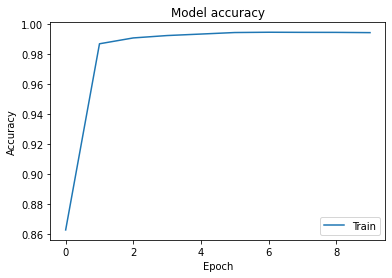

<Figure size 3600x720 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='bottom right')
plt.figure(figsize=(50,10))
plt.show()

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


In [61]:
conv_model.evaluate(test_x,test_y)

196608/196608 [==============================] - 17s 89us/sample - loss: 3.4261 - acc: 0.9906


[3.4260522666069977, 0.9905904]

In [0]:



import pandas as pd
import seaborn as sns
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:

matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))


Figure(720x504)


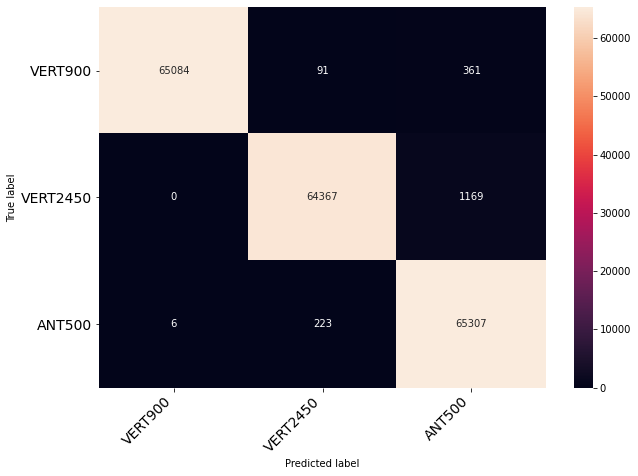

In [65]:
print(print_confusion_matrix(matrix,['VERT900','VERT2450','ANT500']))

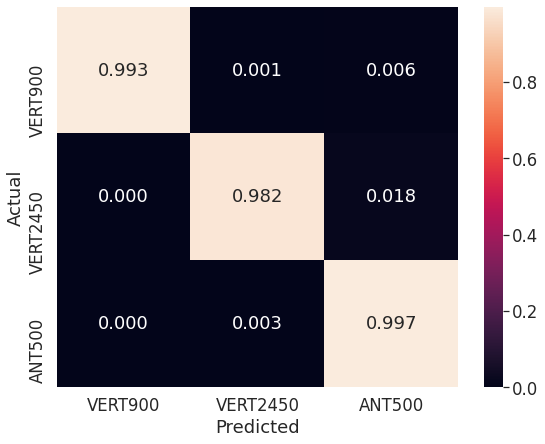

In [66]:
target_names='VERT900','VERT2450','ANT500'
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cmn, annot=True, fmt='.3f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [67]:
from sklearn.metrics import classification_report

print('\033[1m'+classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

     VERT900       1.00      0.99      1.00     65536
    VERT2450       1.00      0.98      0.99     65536
      ANT500       0.98      1.00      0.99     65536

    accuracy                           0.99    196608
   macro avg       0.99      0.99      0.99    196608
weighted avg       0.99      0.99      0.99    196608

